In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Dataset imports

In [2]:
# get training and validation data on dataset 1
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\TrainSet1-new', 
    # our original dataset is 48 pixels by 48 pixels
    image_size = (48,48),
    batch_size = 20 
)

val_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\ValSet1-new', 
    image_size = (48,48), 
    batch_size = 20
)

# get training and validation data on dataset 2
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\TrainSet2-new', 
    image_size = (48,48),
    batch_size = 20 
)

val_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\ValSet2-new', 
    image_size = (48,48), 
    batch_size = 20
)

# get training and validation data on dataset 3
train_ds3 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\TrainSet3-new', 
    image_size = (48,48),
    batch_size = 20 
)

val_ds3 = tf.keras.preprocessing.image_dataset_from_directory(
    'D:\Concordia\COMP473\COMP_473_Project\ValSet3-new', 
    image_size = (48,48), 
    batch_size = 20
)



Found 2760 files belonging to 7 classes.
Found 705 files belonging to 7 classes.
Found 2760 files belonging to 7 classes.
Found 705 files belonging to 7 classes.
Found 2760 files belonging to 7 classes.
Found 705 files belonging to 7 classes.


### Training metrics graph

Automatically update loss and accuracy of the training and the validation set on the graph as the model gets trained

In [3]:
from IPython.display import clear_output

class PlotTrain(tf.keras.callbacks.Callback):

    def on_train_begin(self,logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []

    def on_epoch_end(self,epoch,logs={}):
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        #To plot the graph
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize = (15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), self.metrics[metric], label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), self.metrics['val_' + metric], label = 'val_'+metric)
        
        axs[i].legend()
        axs[i].grid()
        plt.tight_layout()
        plt.show()

### No Pre-Processing Model


##### Model1_t1: Trained and tested with dataset1

In [4]:
model1_t1 = tf.keras.Sequential([

    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 
    
    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(64, activation="relu"), 
    
    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 7 final nodes because we have 7 classes.
    # softmax: compress resulting number between 0~1, used in category problems. 
    # If you add up the probability of each class we get 1. 
    tf.keras.layers.Dense(7, activation="softmax") 
])

model1_t1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                        

##### Model1_t2: Trained and tested with dataset2

In [5]:
model1_t2 = tf.keras.Sequential([

    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 
    
    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(64, activation="relu"), 
    
    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 7 final nodes because we have 7 classes.
    # softmax: compress resulting number between 0~1, used in category problems. 
    # If you add up the probability of each class we get 1. 
    tf.keras.layers.Dense(7, activation="softmax") 
])

model1_t2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 7)                 455       
                                                      

##### Model1_t3: Trained and tested with dataset3

In [6]:
model1_t3 = tf.keras.Sequential([

    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 
    
    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(64, activation="relu"), 
    
    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 7 final nodes because we have 7 classes.
    # softmax: compress resulting number between 0~1, used in category problems. 
    # If you add up the probability of each class we get 1. 
    tf.keras.layers.Dense(7, activation="softmax") 
])

model1_t3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                      

#### Training Basic (No Pre-Processing) Models

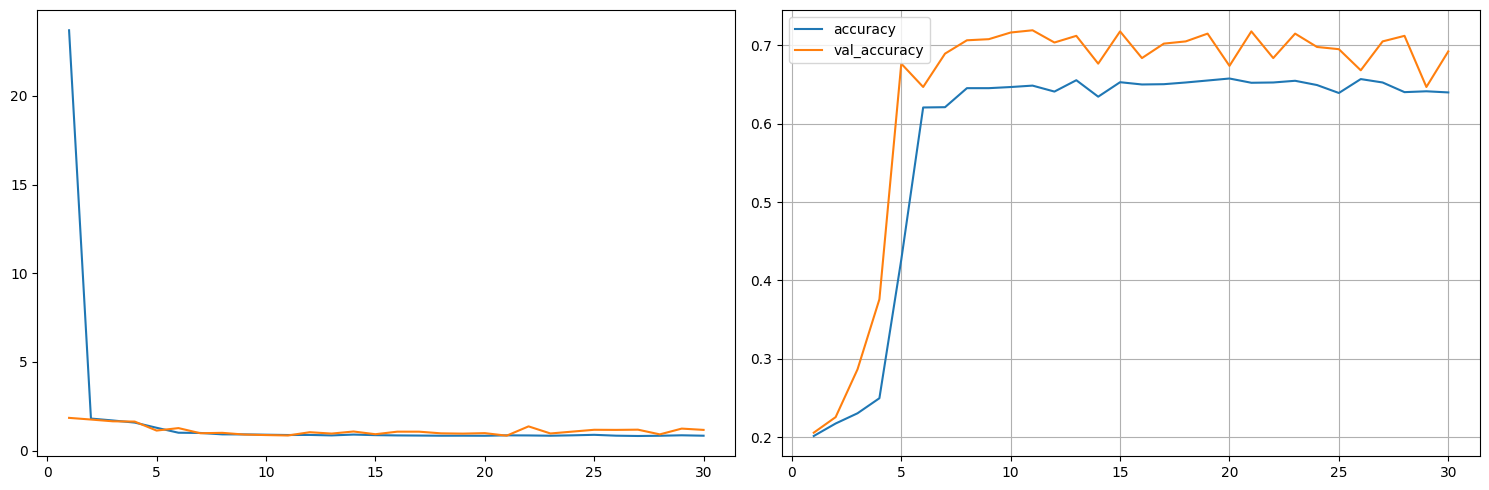

138/138 [==============================] - 5s 38ms/step - loss: 0.8440 - accuracy: 0.6399 - val_loss: 1.1716 - val_accuracy: 0.6922


In [7]:
# compile and fit the model1_t1
callback_list = [PlotTrain()]
model1_t1.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model1_t1.fit(train_ds1, validation_data=val_ds1, epochs=30, callbacks=callback_list)
model1_t1.save("model1_t1.h5")

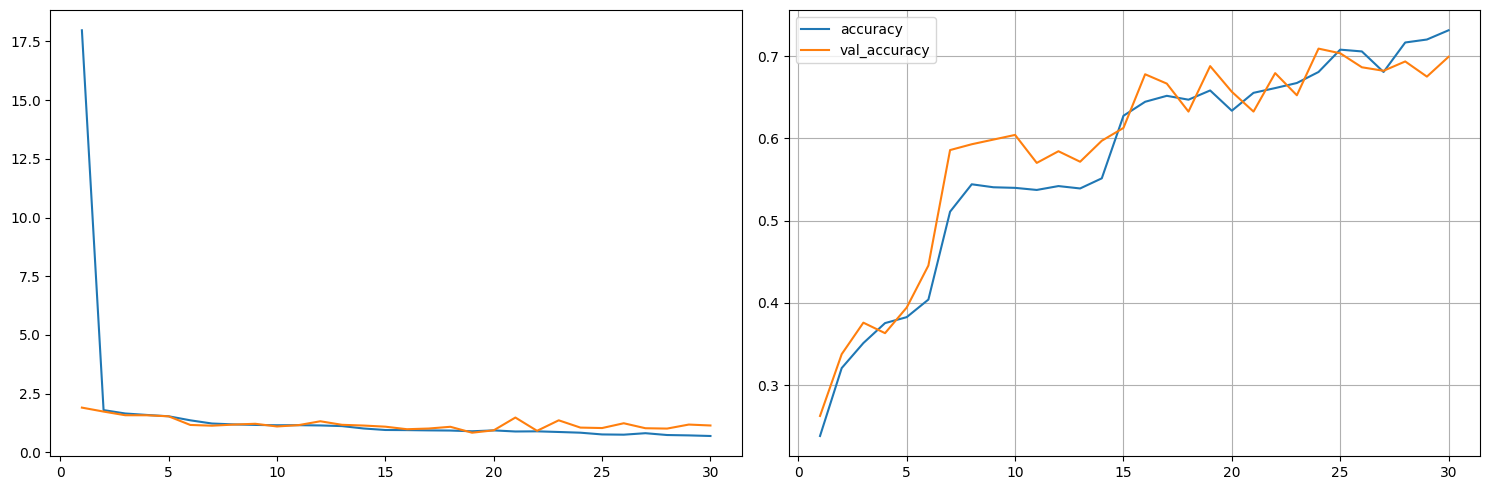

138/138 [==============================] - 6s 44ms/step - loss: 0.6972 - accuracy: 0.7315 - val_loss: 1.1448 - val_accuracy: 0.6993


In [7]:
# compile and fit the model1_t2
callback_list = [PlotTrain()]
model1_t2.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model1_t2.fit(train_ds2, validation_data=val_ds2, epochs=30, callbacks=callback_list)
model1_t2.save("model1_t2.h5")

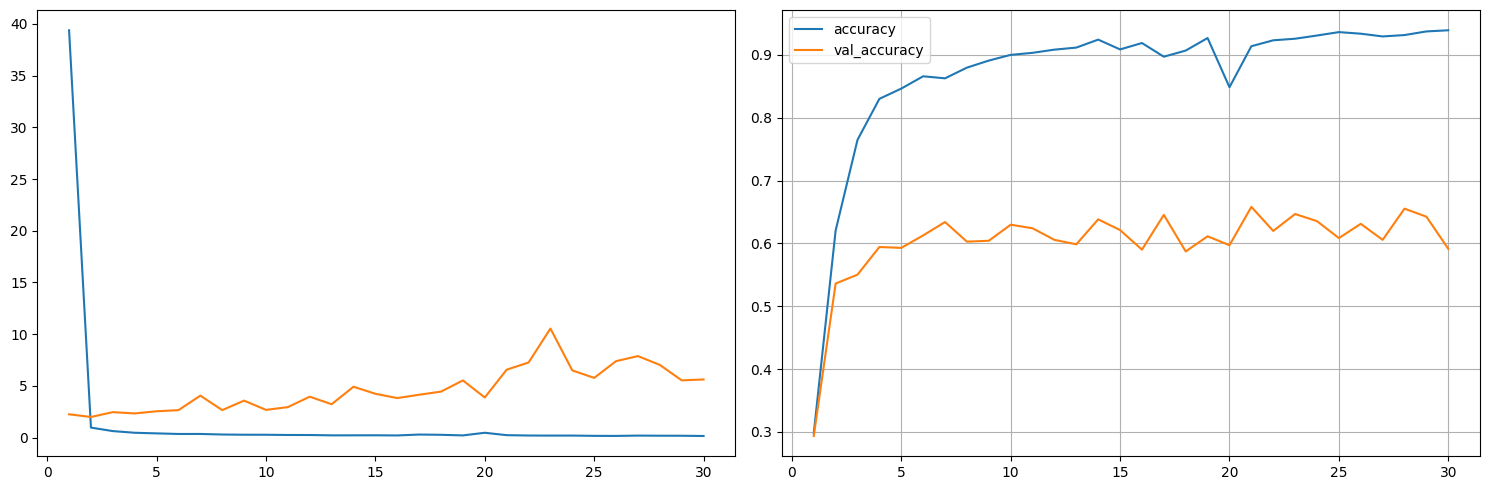

138/138 [==============================] - 6s 46ms/step - loss: 0.1640 - accuracy: 0.9391 - val_loss: 5.6271 - val_accuracy: 0.5915


In [8]:
# compile and fit the model1_t3
callback_list = [PlotTrain()]
model1_t3.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model1_t3.fit(train_ds3, validation_data=val_ds3, epochs=30, callbacks=callback_list)
model1_t3.save("model1_t3.h5")

#### Classification Test: No Pre-Processing Model

In [17]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 
    
    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(64, activation="relu"), 
    
    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 7 final nodes because we have 7 classes.
    # softmax: compress resulting number between 0~1, used in category problems. 
    # If you add up the probability of each class we get 1. 
    tf.keras.layers.Dense(7, activation="softmax") 
])

Model1_t1: Basic model with dataset #1

In [18]:
# test_dir = 'pathToTestData'

#Fetch testing data from the dataset 1
test_dir1 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet1-new'
test_generator1 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds1 = test_generator1.flow_from_directory(test_dir1, target_size=(48,48), batch_size=20, shuffle = False)

#storing actual class associated with each input image with the correct string label
y_true1 = test_ds1.classes
true_class1 = []
for i in y_true1:
    if(i==0):
        true_class1+=['anger']
    if(i==1):
        true_class1+=['contempt']
    if(i==2):
        true_class1+=['disgust']
    if(i==3):
        true_class1+=['fear']
    if(i==4):
        true_class1+=['happy']
    if(i==5):
        true_class1+=['sadness']
    if(i==6):
        true_class1+=['surprise']

#predict the category with the input images from the test set
model.load_weights('model1_t1.h5')
y_predict1= model.predict(test_ds1)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if(i==0):
        predicted_class1+=['anger']
    if(i==1):
        predicted_class1+=['contempt']
    if(i==2):
        predicted_class1+=['disgust']
    if(i==3):
        predicted_class1+=['fear']
    if(i==4):
        predicted_class1+=['happy']
    if(i==5):
        predicted_class1+=['sadness']
    if(i==6):
        predicted_class1+=['surprise']

Found 1440 images belonging to 7 classes.
72/72 [==============================] - 1s 9ms/step


Model1_t2: Basic model with dataset #2

In [20]:
#Fetch testing data from the dataset 1
test_dir2 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet2-new'
test_generator2 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds2 = test_generator2.flow_from_directory(test_dir2, target_size=(48,48), batch_size=20, shuffle = False)

#storing actual class associated with each input image with the correct string label
y_true2 = test_ds2.classes
true_class2 = []
for i in y_true2:
    if(i==0):
        true_class2+=['anger']
    if(i==1):
        true_class2+=['contempt']
    if(i==2):
        true_class2+=['disgust']
    if(i==3):
        true_class2+=['fear']
    if(i==4):
        true_class2+=['happy']
    if(i==5):
        true_class2+=['sadness']
    if(i==6):
        true_class2+=['surprise']

#predict the category with the input images from the test set
model.load_weights('model1_t2.h5')
y_predict2= model.predict(test_ds2)
classes_x2 = np.argmax(y_predict2, axis=1)

#change the class labels to string
predicted_class2 = []
for i in classes_x2:
    if(i==0):
        predicted_class2+=['anger']
    if(i==1):
        predicted_class2+=['contempt']
    if(i==2):
        predicted_class2+=['disgust']
    if(i==3):
        predicted_class2+=['fear']
    if(i==4):
        predicted_class2+=['happy']
    if(i==5):
        predicted_class2+=['sadness']
    if(i==6):
        predicted_class2+=['surprise']

Found 1440 images belonging to 7 classes.
72/72 [==============================] - 1s 9ms/step


Model1_t3: Basic model with dataset #3

In [21]:
#Fetch testing data from the dataset 1
test_dir3 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet3-new'
test_generator3 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds3 = test_generator3.flow_from_directory(test_dir3, target_size=(48,48), batch_size=20, shuffle = False)

#storing actual class associated with each input image with the correct string label
y_true3 = test_ds3.classes
true_class3 = []
for i in y_true3:
    if(i==0):
        true_class3+=['anger']
    if(i==1):
        true_class3+=['contempt']
    if(i==2):
        true_class3+=['disgust']
    if(i==3):
        true_class3+=['fear']
    if(i==4):
        true_class3+=['happy']
    if(i==5):
        true_class3+=['sadness']
    if(i==6):
        true_class3+=['surprise']

#predict the category with the input images from the test set
model.load_weights('model1_t3.h5')
y_predict3= model.predict(test_ds3)
classes_x3 = np.argmax(y_predict3, axis=1)

#change the class labels to string
predicted_class3 = []
for i in classes_x3:
    if(i==0):
        predicted_class3+=['anger']
    if(i==1):
        predicted_class3+=['contempt']
    if(i==2):
        predicted_class3+=['disgust']
    if(i==3):
        predicted_class3+=['fear']
    if(i==4):
        predicted_class3+=['happy']
    if(i==5):
        predicted_class3+=['sadness']
    if(i==6):
        predicted_class3+=['surprise']

Found 1440 images belonging to 7 classes.
72/72 [==============================] - 1s 9ms/step


#### Results after classification

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
classes =['anger', 'contempt', 'disgust','fear','happy', 'sadness','surprise']

Model1_t1 : Basic model with dataset #1

              precision    recall  f1-score   support

       anger       0.41      0.93      0.57       195
    contempt       0.00      0.00      0.00        75
     disgust       1.00      0.90      0.95       270
        fear       0.62      0.05      0.09       105
       happy       0.78      1.00      0.88       315
     sadness       0.00      0.00      0.00       120
    surprise       0.87      0.84      0.86       360

    accuracy                           0.73      1440
   macro avg       0.53      0.53      0.48      1440
weighted avg       0.68      0.73      0.67      1440



c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

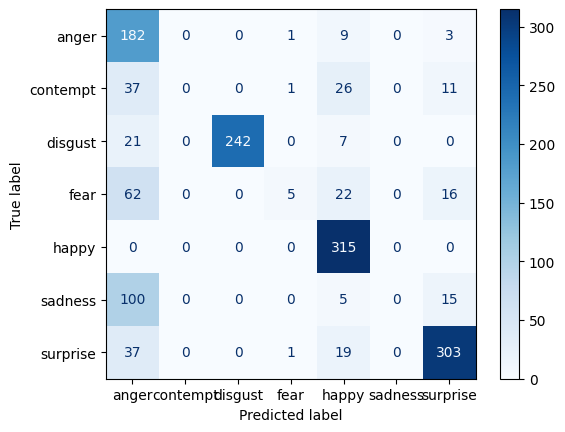

In [19]:
print(classification_report(true_class1, predicted_class1))
cf_model1 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model1, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Model1_t2: Basic model with dataset #2

              precision    recall  f1-score   support

       anger       0.65      0.75      0.70       195
    contempt       0.40      0.27      0.32        75
     disgust       0.85      0.78      0.81       270
        fear       0.38      0.38      0.38       105
       happy       0.91      0.97      0.94       315
     sadness       0.45      0.07      0.13       120
    surprise       0.78      1.00      0.88       360

    accuracy                           0.76      1440
   macro avg       0.63      0.60      0.59      1440
weighted avg       0.73      0.76      0.73      1440



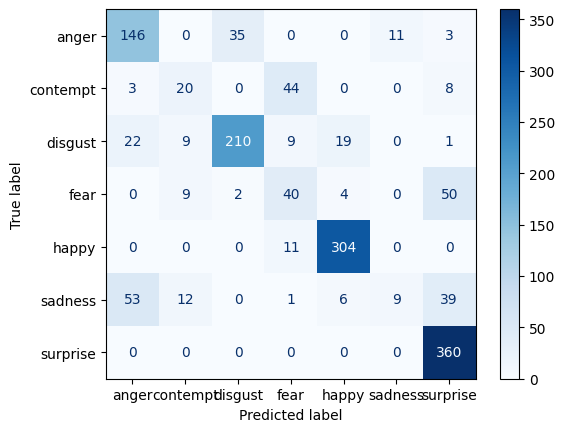

In [22]:
print(classification_report(true_class2, predicted_class2))
cf_model2 = confusion_matrix(true_class2, predicted_class2, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model2, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Model1_t3: Basic model with dataset #3

              precision    recall  f1-score   support

       anger       0.64      0.73      0.68       195
    contempt       0.90      0.60      0.72        75
     disgust       0.89      0.84      0.86       270
        fear       0.71      0.14      0.24       105
       happy       0.79      0.99      0.88       315
     sadness       0.57      0.39      0.47       120
    surprise       0.83      0.94      0.88       360

    accuracy                           0.78      1440
   macro avg       0.76      0.66      0.68      1440
weighted avg       0.78      0.78      0.76      1440



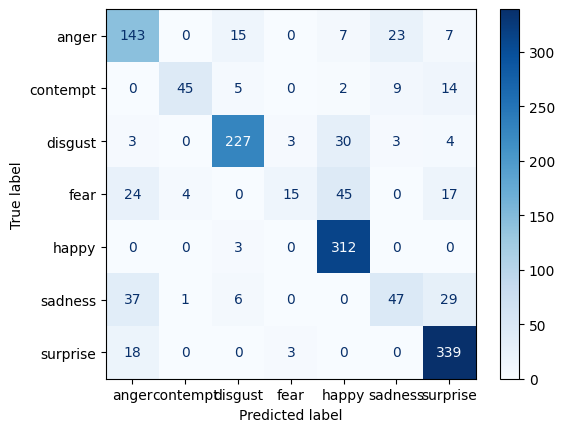

In [23]:
print(classification_report(true_class3, predicted_class3))
cf_model3 = confusion_matrix(true_class3, predicted_class3, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model3, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Image Cropping

Model1_t1 : Basic model with dataset #1

In [4]:
model2_t1 = tf.keras.Sequential([
    tf.keras.layers.Cropping2D(cropping=((10,10),(10,3)), input_shape = (48, 48, 3)),
    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 

    ## 1st layer
    tf.keras.layers.Dense(64, activation="relu"), # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dropout(0.2), # helps prevent overfittng
    
    ## second layer. we must have 7 final nodes because we have 7 classes.
    tf.keras.layers.Dense(7, activation="softmax") # softmax: compress resulting number between 0~1, used in category problems. If you add up the probability of each class we get 1. 
])
# model2.add(tf.keras.layers.Cropping2D(cropping=((10,10),(10,3))))
model2_t1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (None, 28, 35, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 35, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 17, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7616)              0         
                                                                 
 dense (Dense)               (None, 64)                487488    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

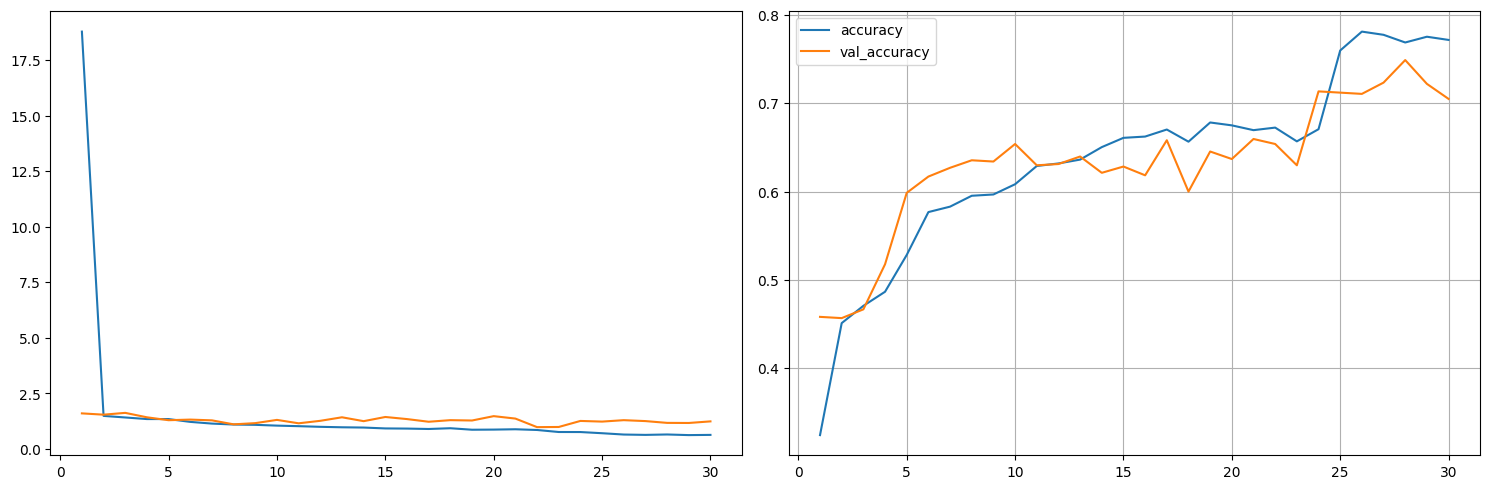

138/138 [==============================] - 3s 18ms/step - loss: 0.6367 - accuracy: 0.7717 - val_loss: 1.2448 - val_accuracy: 0.7050


In [5]:
callback_list = [PlotTrain()]
model2_t1.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model2_t1.fit(train_ds1, validation_data=val_ds1, epochs=30,callbacks=callback_list)
model2_t1.save('model2_t1.h5')

In [4]:
model2_t2 = tf.keras.Sequential([
    tf.keras.layers.Cropping2D(cropping=((10,10),(10,3)), input_shape = (48, 48, 3)),
    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 

    ## 1st layer
    tf.keras.layers.Dense(64, activation="relu"), # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dropout(0.2), # helps prevent overfittng
    
    ## second layer. we must have 7 final nodes because we have 7 classes.
    tf.keras.layers.Dense(7, activation="softmax") # softmax: compress resulting number between 0~1, used in category problems. If you add up the probability of each class we get 1. 
])
# model2.add(tf.keras.layers.Cropping2D(cropping=((10,10),(10,3))))
model2_t2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (None, 28, 35, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 35, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 17, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7616)              0         
                                                                 
 dense (Dense)               (None, 64)                487488    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

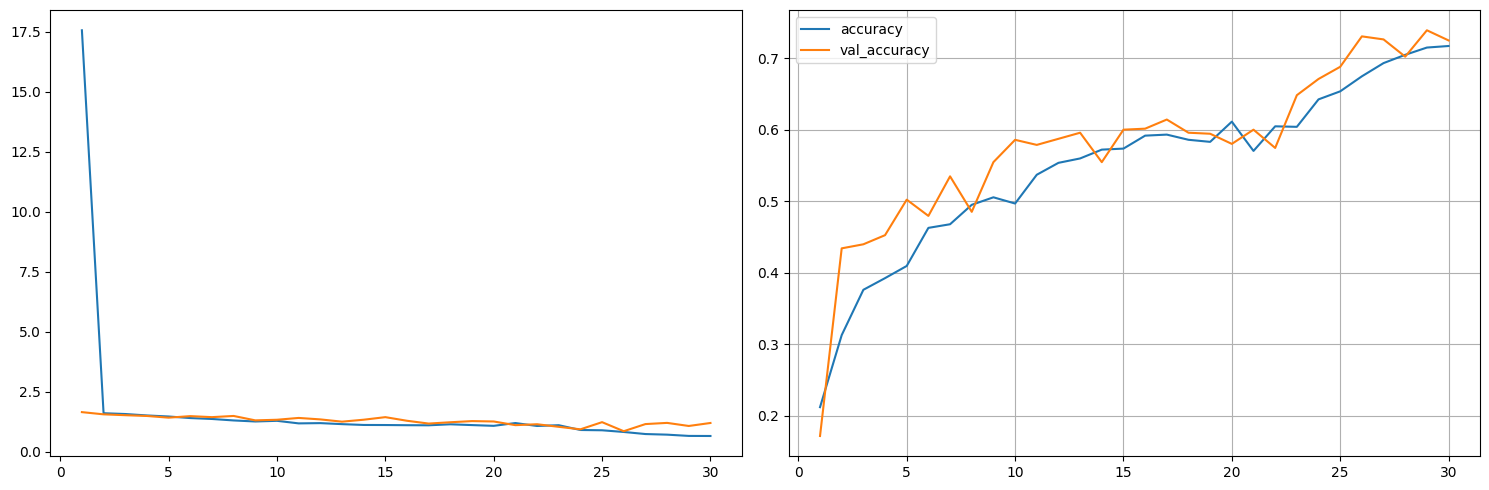

138/138 [==============================] - 3s 19ms/step - loss: 0.6510 - accuracy: 0.7170 - val_loss: 1.1931 - val_accuracy: 0.7248


In [5]:
callback_list = [PlotTrain()]
model2_t2.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model2_t2.fit(train_ds2, validation_data=val_ds2, epochs=30,callbacks=callback_list)
model2_t2.save('model2_t2.h5')


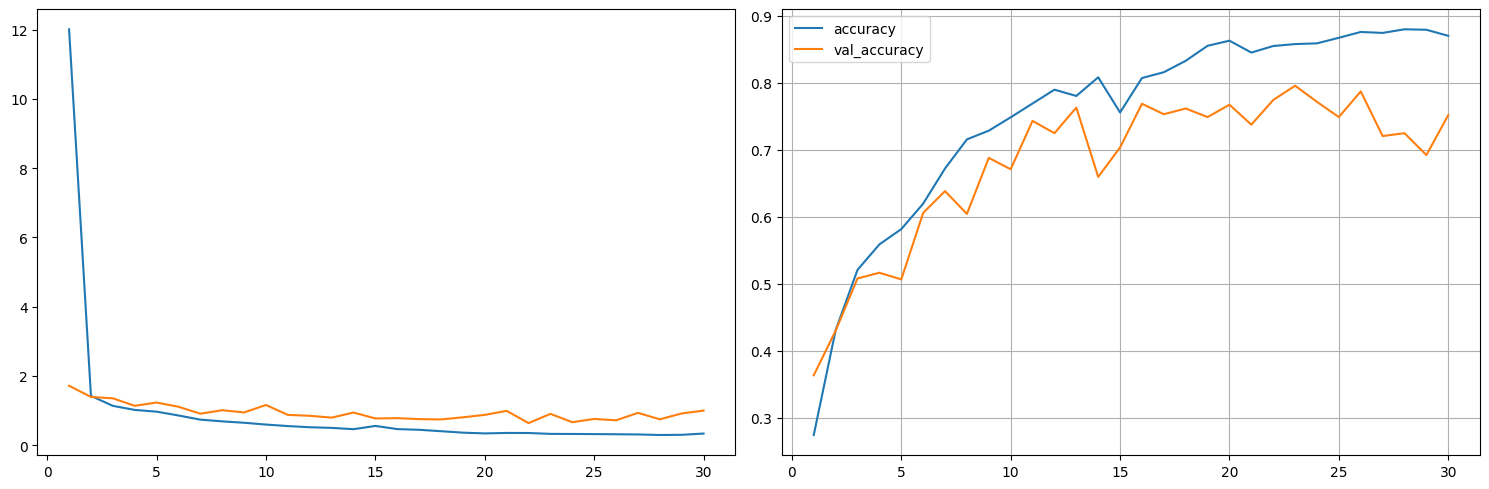

138/138 [==============================] - 2s 18ms/step - loss: 0.3379 - accuracy: 0.8703 - val_loss: 0.9999 - val_accuracy: 0.7518


In [4]:
model2_t3 = tf.keras.Sequential([
    tf.keras.layers.Cropping2D(cropping=((10,10),(10,3)), input_shape = (48, 48, 3)),
    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 

    ## 1st layer
    tf.keras.layers.Dense(64, activation="relu"), # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dropout(0.2), # helps prevent overfittng
    
    ## second layer. we must have 7 final nodes because we have 7 classes.
    tf.keras.layers.Dense(7, activation="softmax") # softmax: compress resulting number between 0~1, used in category problems. If you add up the probability of each class we get 1. 
])
# model2.add(tf.keras.layers.Cropping2D(cropping=((10,10),(10,3))))
model2_t3.summary()


callback_list = [PlotTrain()]
model2_t3.compile(loss="sparse_categorical_crossentropy", optimizer="adam" , metrics=['accuracy'])
model2_t3.fit(train_ds3, validation_data=val_ds3, epochs=30,callbacks=callback_list)
model2_t3.save('model2_t3.h5')

#### Results and classification

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
classes =['anger', 'contempt', 'disgust','fear','happy', 'sadness','surprise']

model = tf.keras.Sequential([
    tf.keras.layers.Cropping2D(cropping=((10,10),(10,3)), input_shape = (48, 48, 3)),
    tf.keras.layers.Conv2D( 32, (3,3), padding='same' , activation='relu', input_shape=(48,48,3)), 
    
    # pooling layer (Downsampling)
    # downsize 2,2 pixels to 1,1
    tf.keras.layers.MaxPooling2D((2,2)),

    # Flatten-Dense
    tf.keras.layers.Flatten(), 
    
    ## 1st layer
    # number inside Dense is the number of nodes. usually use 2^n
    tf.keras.layers.Dense(64, activation="relu"), 
    
    # helps prevent overfittng
    tf.keras.layers.Dropout(0.2),

    ## second layer. we must have 7 final nodes because we have 7 classes.
    # softmax: compress resulting number between 0~1, used in category problems. 
    # If you add up the probability of each class we get 1. 
    tf.keras.layers.Dense(7, activation="softmax") 
])

Model2_t1 : Basic model with dataset #1

Found 1440 images belonging to 7 classes.
72/72 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

       anger       0.44      0.60      0.51       195
    contempt       0.00      0.00      0.00        75
     disgust       0.87      0.80      0.83       270
        fear       0.10      0.08      0.09       105
       happy       0.87      0.90      0.88       315
     sadness       0.53      0.22      0.31       120
    surprise       0.67      0.89      0.77       360

    accuracy                           0.67      1440
   macro avg       0.50      0.50      0.48      1440
weighted avg       0.63      0.67      0.64      1440



c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

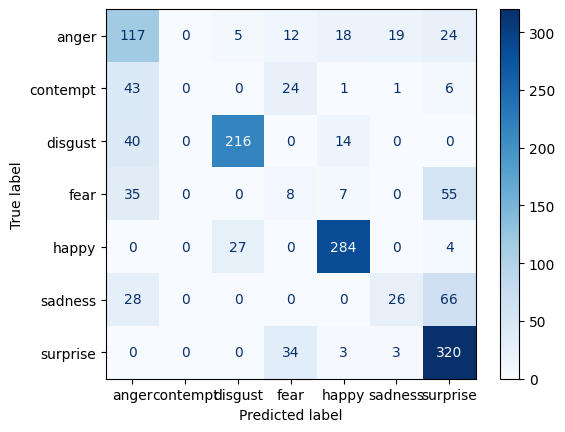

In [6]:
#Fetch testing data from the dataset 1
test_dir1 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet1-new'
test_generator1 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds1 = test_generator1.flow_from_directory(test_dir1, target_size=(48,48), batch_size=20, shuffle = False)

#storing actual class associated with each input image with the correct string label
y_true1 = test_ds1.classes
true_class1 = []
for i in y_true1:
    if(i==0):
        true_class1+=['anger']
    if(i==1):
        true_class1+=['contempt']
    if(i==2):
        true_class1+=['disgust']
    if(i==3):
        true_class1+=['fear']
    if(i==4):
        true_class1+=['happy']
    if(i==5):
        true_class1+=['sadness']
    if(i==6):
        true_class1+=['surprise']

#predict the category with the input images from the test set
model.load_weights('model2_t1.h5')
y_predict1= model.predict(test_ds1)
classes_x1 = np.argmax(y_predict1, axis=1)

#change the class labels to string
predicted_class1 = []
for i in classes_x1:
    if(i==0):
        predicted_class1+=['anger']
    if(i==1):
        predicted_class1+=['contempt']
    if(i==2):
        predicted_class1+=['disgust']
    if(i==3):
        predicted_class1+=['fear']
    if(i==4):
        predicted_class1+=['happy']
    if(i==5):
        predicted_class1+=['sadness']
    if(i==6):
        predicted_class1+=['surprise']


print(classification_report(true_class1, predicted_class1))
cf_model1 = confusion_matrix(true_class1, predicted_class1, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model1, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Model2_t2 : Basic model with dataset #2

Found 1440 images belonging to 7 classes.
72/72 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

       anger       0.70      0.76      0.73       195
    contempt       0.00      0.00      0.00        75
     disgust       0.87      0.84      0.86       270
        fear       0.79      0.26      0.39       105
       happy       0.88      0.98      0.92       315
     sadness       0.45      0.32      0.37       120
    surprise       0.71      0.99      0.83       360

    accuracy                           0.77      1440
   macro avg       0.63      0.59      0.59      1440
weighted avg       0.72      0.77      0.73      1440



c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\phael\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

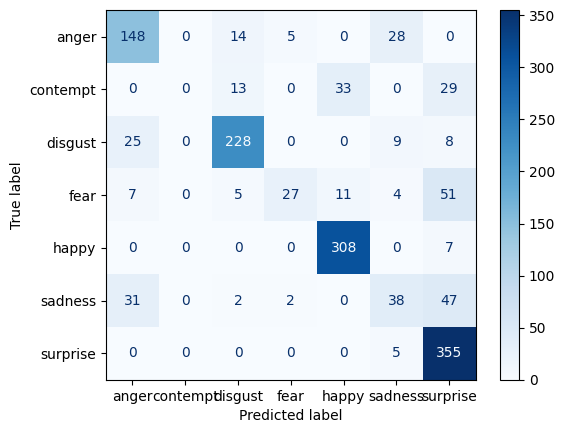

In [7]:
#Fetch testing data from the dataset 1
test_dir2 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet2-new'
test_generator2 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds2 = test_generator2.flow_from_directory(test_dir2, target_size=(48,48), batch_size=20, shuffle = False)

#storing actual class associated with each input image with the correct string label
y_true2 = test_ds2.classes
true_class2 = []
for i in y_true2:
    if(i==0):
        true_class2+=['anger']
    if(i==1):
        true_class2+=['contempt']
    if(i==2):
        true_class2+=['disgust']
    if(i==3):
        true_class2+=['fear']
    if(i==4):
        true_class2+=['happy']
    if(i==5):
        true_class2+=['sadness']
    if(i==6):
        true_class2+=['surprise']

#predict the category with the input images from the test set
model.load_weights('model2_t2.h5')
y_predict2= model.predict(test_ds2)
classes_x2 = np.argmax(y_predict2, axis=1)

#change the class labels to string
predicted_class2 = []
for i in classes_x2:
    if(i==0):
        predicted_class2+=['anger']
    if(i==1):
        predicted_class2+=['contempt']
    if(i==2):
        predicted_class2+=['disgust']
    if(i==3):
        predicted_class2+=['fear']
    if(i==4):
        predicted_class2+=['happy']
    if(i==5):
        predicted_class2+=['sadness']
    if(i==6):
        predicted_class2+=['surprise']


print(classification_report(true_class2, predicted_class2))
cf_model2 = confusion_matrix(true_class2, predicted_class2, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model2, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Model2_t3 : Basic model with dataset #3

Found 1440 images belonging to 7 classes.
72/72 [==============================] - 1s 9ms/step
              precision    recall  f1-score   support

       anger       0.98      0.98      0.98       195
    contempt       0.95      0.76      0.84        75
     disgust       1.00      1.00      1.00       270
        fear       0.95      0.89      0.92       105
       happy       0.94      1.00      0.97       315
     sadness       0.94      0.85      0.89       120
    surprise       0.97      1.00      0.98       360

    accuracy                           0.96      1440
   macro avg       0.96      0.93      0.94      1440
weighted avg       0.96      0.96      0.96      1440



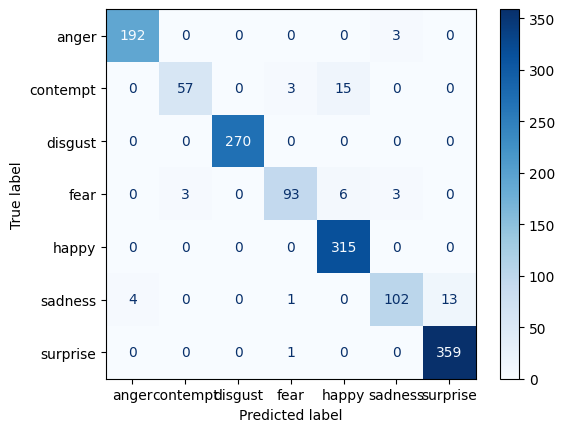

In [8]:
#Fetch testing data from the dataset 1
test_dir3 = 'D:\Concordia\COMP473\COMP_473_Project\TestSet2-new'
test_generator3 = tf.keras.preprocessing.image.ImageDataGenerator()
test_ds3 = test_generator3.flow_from_directory(test_dir3, target_size=(48,48), batch_size=20, shuffle = False)

#storing actual class associated with each input image with the correct string label
y_true3 = test_ds3.classes
true_class3 = []
for i in y_true3:
    if(i==0):
        true_class3+=['anger']
    if(i==1):
        true_class3+=['contempt']
    if(i==2):
        true_class3+=['disgust']
    if(i==3):
        true_class3+=['fear']
    if(i==4):
        true_class3+=['happy']
    if(i==5):
        true_class3+=['sadness']
    if(i==6):
        true_class3+=['surprise']

#predict the category with the input images from the test set
model.load_weights('model2_t3.h5')
y_predict3= model.predict(test_ds3)
classes_x3 = np.argmax(y_predict3, axis=1)

#change the class labels to string
predicted_class3 = []
for i in classes_x3:
    if(i==0):
        predicted_class3+=['anger']
    if(i==1):
        predicted_class3+=['contempt']
    if(i==2):
        predicted_class3+=['disgust']
    if(i==3):
        predicted_class3+=['fear']
    if(i==4):
        predicted_class3+=['happy']
    if(i==5):
        predicted_class3+=['sadness']
    if(i==6):
        predicted_class3+=['surprise']


print(classification_report(true_class3, predicted_class3))
cf_model3 = confusion_matrix(true_class3, predicted_class3, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_model3, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()